<div style="text-align: right"> Jacob Knopping </div>
<div style="text-align: right"> 12/19/19 </div>

## _CAPSTONE 2:_
## Comparing Volkswagen Jetta and Chevrolet Cruze Real-World Fuel Economies

### 1.0 Introduction

Drivers often find that their real-world miles per gallon (MPG) often does not match Environmental Protection Agency (EPA) fuel ratings [2]. There are a few factors that may explain this gap. First, the EPA doesn't conduct its own tests. Because of budget, equipment, and manpower limitations, the EPA instead establishes test protocols and allows for auto companies to test its own vehicles [2]. Secondly, the test protocols established by the EPA for combined MPG assume the average driver is on the highway 45% of the time, and in the city 55% percent of the time [2]. This may be inaccurate, driving fuel economy data one way or another.

This problem begs the question: is there a better way to measure fuel economy so that two vehicles can accurately be compared to one another? In this report, we will conduct an experiment to obtain real-world fuel economy data via crowdsourcing, and compare the fuel economies of two popular fuel-efficient vehicles, the 2019 Volkswagen Jetta (EPA: 34 mpg [1]) and Chevrolet Cruze (EPA: 32 mpg [1]). The hypothesis is that the real-world fuel economy data will prove that the Volkswagen Jetta is in fact more fuel-efficient that the Chevrolet Cruze, based on the MPG key metric. In contrast, the null hypothesis is this experiment is that there is no difference in fuel-economies between these two vehicles.

### 2.0 Data

In order to obtain data for the experiment, a method of crowdsourcing was conducted. Drivers currently leasing either 2019 vehicle were asked to report their combined monthly MPG in exchange for a chance to win a free payment, and only the first 100 drivers of each vehicle were selected. This process was repeated for five months (August through December) in order to obtain n=500 for both groups. Drivers were only allowed to enter once. There should be no contextual bias based on the random location and time of year.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Generating dataset
np.random.seed(42)

#storing the random data and labels
data = []
groups = []

#Generating data for each group 
vw_jetta_epa = 33
vw_jetta_var = 2
vw_jetta_size = 500

chev_cruze_epa = 32
chev_cruze_var = 3
chev_cruze_size = 500

data.extend(np.random.normal(vw_jetta_epa, vw_jetta_var, vw_jetta_size))
data.extend(np.random.normal(chev_cruze_epa, chev_cruze_var, chev_cruze_size))
groups.extend(['VW Jetta']*vw_jetta_size)
groups.extend(['Chevrolet Cruze']*chev_cruze_size)

The .head() and .shape methods are used below to verify the dataframe looks correct.

In [3]:
df = pd.DataFrame({'MPG': data, 
                     'Make/Model' : groups})
print(df.shape)
df.head()

(1000, 2)


,MPG,Make/Model
0,33.993428,VW Jetta
1,32.723471,VW Jetta
2,34.295377,VW Jetta
3,36.046060,VW Jetta
4,32.531693,VW Jetta


As expected, the size of the dataframe is 1000 (n=500 for both vehicles).

### 3.0 Analysis

Next, the dataframe is split by vehicle type in order obtain summary statistics for each vehicle and verify sample sizes.

              MPG
count  500.000000
mean    33.013676
std      1.962506
min     26.517465
25%     31.599385
50%     33.025594
75%     34.273567
max     40.705463
NormaltestResult(statistic=4.223512237375456, pvalue=0.12102524501156653)
p_value = 0.121025


The null hypothesis cannot be rejected (fail to reject H0)


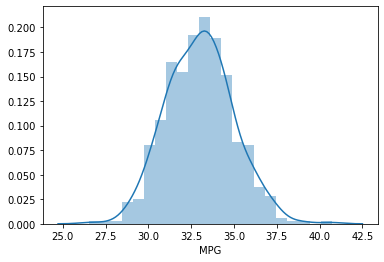

In [4]:
df_VW = df.loc[df['Make/Model'] == 'VW Jetta']
print(df_VW.describe())

sns.distplot(df_VW.MPG)

print(stats.normaltest(df_VW.MPG))
t_value, p_value = stats.normaltest(df_VW.MPG)
alpha = .05
print("p_value = {:g}".format(p_value))
print('\n')
if p_value < alpha:  # null hypothesis(H0): distribution is normal
     print("The null hypothesis can be rejected (reject H0)")
else:
    print("The null hypothesis cannot be rejected (fail to reject H0)")

Summary statistics from above are appropriate as the distribution appears normal. In addition, the SciPy normal test fails to reject the null hypothesis (the distribution is normal).

The mean MPG for the Volkswagen Jetta is 33.01, and the count is as expected (n=500).

              MPG
count  500.000000
mean    32.095478
std      2.933992
min     23.909340
25%     30.214125
50%     32.085595
75%     33.953727
max     39.897146
NormaltestResult(statistic=0.4350466073072166, pvalue=0.8045088567056563)
p_value = 0.804509


The null hypothesis cannot be rejected (fail to reject H0)


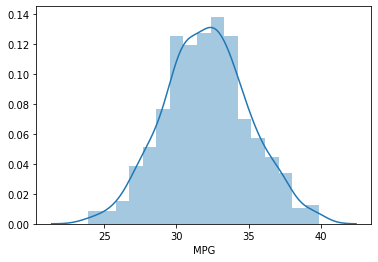

In [5]:
df_chev = df.loc[df['Make/Model'] == 'Chevrolet Cruze']
print(df_chev.describe())

sns.distplot(df_chev.MPG)
print(stats.normaltest(df_chev.MPG))
t_value, p_value = stats.normaltest(df_chev.MPG)
alpha = .05
print("p_value = {:g}".format(p_value))
print('\n')
if p_value < alpha:  # null hypothesis(H0): distribution is normal
     print("The null hypothesis can be rejected (reject H0)")
else:
    print("The null hypothesis cannot be rejected (fail to reject H0)")

Again, summary statistics from above are appropriate as the distribution appears normal. In addition, the SciPy normal test fails to reject the null hypothesis (the distribution is normal).

The mean MPG for the Chevrolet Cruze is 32.09, and the count is as expected (n=500).

Next, we use a violin plot, a box plot, and a histogram to perform a visual analysis of the data.

Text(0.5, 1.0, 'MPG by Make/Model (2019 Models)')

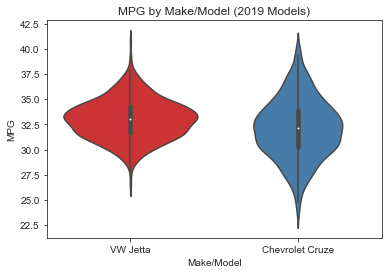

In [6]:
sns.set_palette(palette='Set1', n_colors=2)
sns.set_style('ticks')
sns.violinplot(x='Make/Model', y='MPG', data=df)
plt.title('MPG by Make/Model (2019 Models)')

The violin plot shows the probability density for both vehicles. The probability density distribution is more compact for the Jetta, suggesting MPG ratings are generally closer to the mean. Meanwhile, the distribution range for the Cruze also appears larger. A box plot will allow for a more direct comparison of each vehicles MPG range.

Text(0.5, 1, 'MPG Point Plot (2019 Models)')

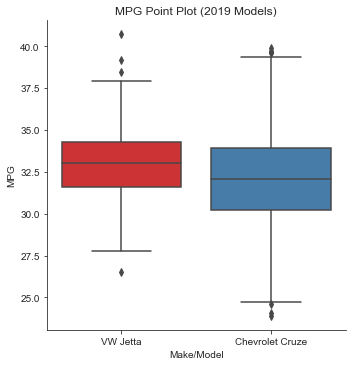

In [7]:
sns.catplot(x='Make/Model', y='MPG', kind='box', data=df)
plt.title('MPG Point Plot (2019 Models)')

The box plot confirms that the reported monthly range of MPG was greater for the Cruze than the Jetta. In addition, the difference in the mean is more clear, as the Jetta performs approximately 1 MPG greater than the Cruze.

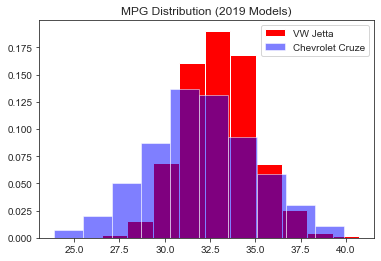

In [8]:
plt.hist(df.loc[df['Make/Model'] == 'VW Jetta'].MPG, alpha=1, density=True, color='red', label='VW Jetta')
plt.hist(df.loc[df['Make/Model'] == 'Chevrolet Cruze'].MPG, alpha=0.5, density=True, color='blue', label='Chevrolet Cruze')
plt.legend(loc='best')
plt.title('MPG Distribution (2019 Models)')
plt.show()

The histogram above shows the MPG distribution for each vehicle, and where they overlap. The distribution for the Jetta is more centered around the mean, while MPG values are more spread out for the Cruze. That said, the distributions appear similar overall. A statistical evaluation is needed to determine the significance of the visual difference. For this, a T-test is conducted below.

In [9]:
print(stats.ttest_ind(df.loc[df['Make/Model'] == 'VW Jetta'].MPG,
               df.loc[df['Make/Model'] == 'Chevrolet Cruze'].MPG))

t_value, p_value = (stats.ttest_ind(df.loc[df['Make/Model'] == 'VW Jetta'].MPG,
               df.loc[df['Make/Model'] == 'Chevrolet Cruze'].MPG))
alpha = .001
print("t_value = {:g}".format(t_value))
print("p_value = {:g}".format(p_value))
if p_value < alpha:  # null hypothesis(H0): no difference in fuel-economies
     print("The null hypothesis can be rejected (reject H0)")
else:
    print("The null hypothesis cannot be rejected (fail to reject H0)")



Ttest_indResult(statistic=5.816566690907049, pvalue=8.08314529058007e-09)
t_value = 5.81657
p_value = 8.08315e-09
The null hypothesis can be rejected (reject H0)


The T-test from the SciPy library rejects the null hypothesis, that there is no difference in fuel economies as measured by MPG, based on an alpha value of .001. This strongly suggests that the hypothesis is correct, and that the real-world fuel economy data proves the Volkswagen Jetta has a higher MPG than that of the Chevrolet Cruze.

### 4.0 Conclusion

The mean of reported monthly MPG data was approximately 33 MPG for the Volkswagen Jetta, compared to a mean of approximately 32 MPG for the Chevrolet Cruze. Based on the statistical (SciPy t-test) data, this difference in the means is significant. In addition, the distribution for the Cruze showed more variance in MPG than the Volkswagen Jetta. This was confirmed by both the visual (boxplot, violin plot, and histogram) and statisical data (quartile ranges).

Overall, the real-world fuel economy data (using the MPG metric) proved more rigorous, and conclusive than comparing EPA estimates.

### 5.0 References

[1] “Compare Side-by-Side,” 2019 Chevrolet Cruze. [Online]. Available: https://www.fueleconomy.gov/feg/Find.do?action=sbs&id=40470. [Accessed: 19-Dec-2019].

[2] “Here's Why Real-World MPG Doesn't Match EPA Ratings,” Edmunds, 12-Nov-2012. [Online]. Available: https://www.edmunds.com/fuel-economy/heres-why-real-world-mpg-doesnt-match-epa-ratings.html. [Accessed: 19-Dec-2019].